In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import matplotlib.pyplot as plt 
import pandas as pd

In [3]:
root = "/home/endtheme/git/bird-class/data/"
txt_path = os.path.join(root, "train.txt")

a = pd.read_csv(txt_path, sep=" ", names= ["path", "label"])
a

,path,label
0,Black_footed_Albatross_0004_2731401028.jpg,0
1,Black_footed_Albatross_0008_1384283201.jpg,0
2,Black_footed_Albatross_0011_820118444.jpg,0
3,Black_footed_Albatross_0003_2981373810.jpg,0
4,Black_footed_Albatross_0021_2443213385.jpg,0
...,...,...
4824,Common_Yellowthroat_0012_2573777857.jpg,199
4825,Common_Yellowthroat_0002_2679007659.jpg,199
4826,Common_Yellowthroat_0009_2099303008.jpg,199
4827,Common_Yellowthroat_0008_2691070273.jpg,199


In [4]:
root = "/home/endtheme/git/bird-class/data/"
txt_path = os.path.join(root, "train.txt")
labels = []
img_paths = []
with open(txt_path, 'r') as file:
    for line in file:
# Remove any trailing characters like newlines or spaces
        line = line.strip().split(" ")
        # print("img: ", line[0])
        # print("label: ", int(line[1])) 
        labels.append(int(line[1]))
        img_paths.append(line[0])
data = pd.DataFrame({"path":img_paths,"label":labels})
data

,path,label
0,Black_footed_Albatross_0004_2731401028.jpg,0
1,Black_footed_Albatross_0008_1384283201.jpg,0
2,Black_footed_Albatross_0011_820118444.jpg,0
3,Black_footed_Albatross_0003_2981373810.jpg,0
4,Black_footed_Albatross_0021_2443213385.jpg,0
...,...,...
4824,Common_Yellowthroat_0012_2573777857.jpg,199
4825,Common_Yellowthroat_0002_2679007659.jpg,199
4826,Common_Yellowthroat_0009_2099303008.jpg,199
4827,Common_Yellowthroat_0008_2691070273.jpg,199


<Axes: >

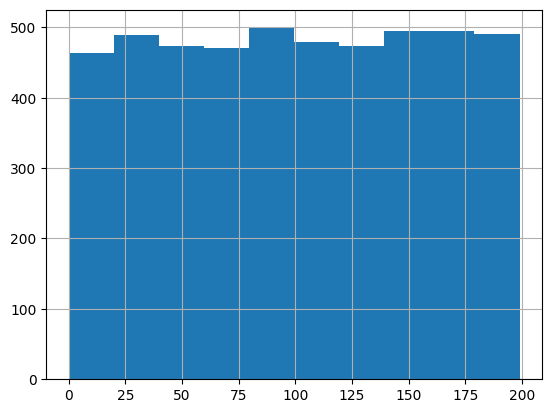

In [5]:
data.label.hist()

In [6]:
from utils.utils import get_dataloader
from torchvision import datasets, transforms
batch_size = 4
data_path = "/home/endtheme/git/bird-class/data/"
import torchvision.transforms as transform
from torchvision.transforms import v2
import torchvision
train_transformer = transform.Compose([
                           transform.Resize((256, 256)),
                           transform.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
                           transform.RandomRotation(5),
                           transform.RandomGrayscale(),
                           transform.RandomResizedCrop(224),
                           transform.RandomHorizontalFlip(),
                           
                           transform.RandomAffine(degrees=11, translate=(0.1,0.1), scale=(0.8,0.8)),
                           transform.ToTensor(),
                           transform.Normalize((0.4124234616756439, 0.3674212694168091, 0.2578217089176178), 
                                               (0.3268945515155792, 0.29282665252685547, 0.29053378105163574))
])


test_transformer = transform.Compose([
                           transform.Resize((256, 256)),
                           
                           transform.ToTensor(),
                           transform.Normalize((0.4124234616756439, 0.3674212694168091, 0.2578217089176178), 
                                               (0.3268945515155792, 0.29282665252685547, 0.29053378105163574))
])
shuffle = True

train_loader,test_loader = get_dataloader(data_path = data_path, train_transform = train_transformer, test_transform = test_transformer, batch_size = batch_size, shuffle = shuffle)




In [7]:
# import importlib
# importlib.reload(model)

In [8]:
# for (a,b) in train_loader:
#     print(b)

In [9]:
from trainer import Trainer
from model.baseline import BirdClassifier
model = BirdClassifier()
trainer = Trainer(model,train_loader, test_loader)
trainer.train()

/home/endtheme/miniconda3/envs/bird/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/endtheme/miniconda3/envs/bird/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [08:12<?, ?it/s]


UnboundLocalError: local variable 'valid_loss' referenced before assignment